In [2]:
import matplotlib.pyplot as plt
import pickle
import plotly.express as px
from random import sample

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
with open("/home/mario/Documents/Facultate/Licenta/Code/python_objects/categorized_pd.pkl", "rb") as file:
    categorised_data = pickle.load(file)
    

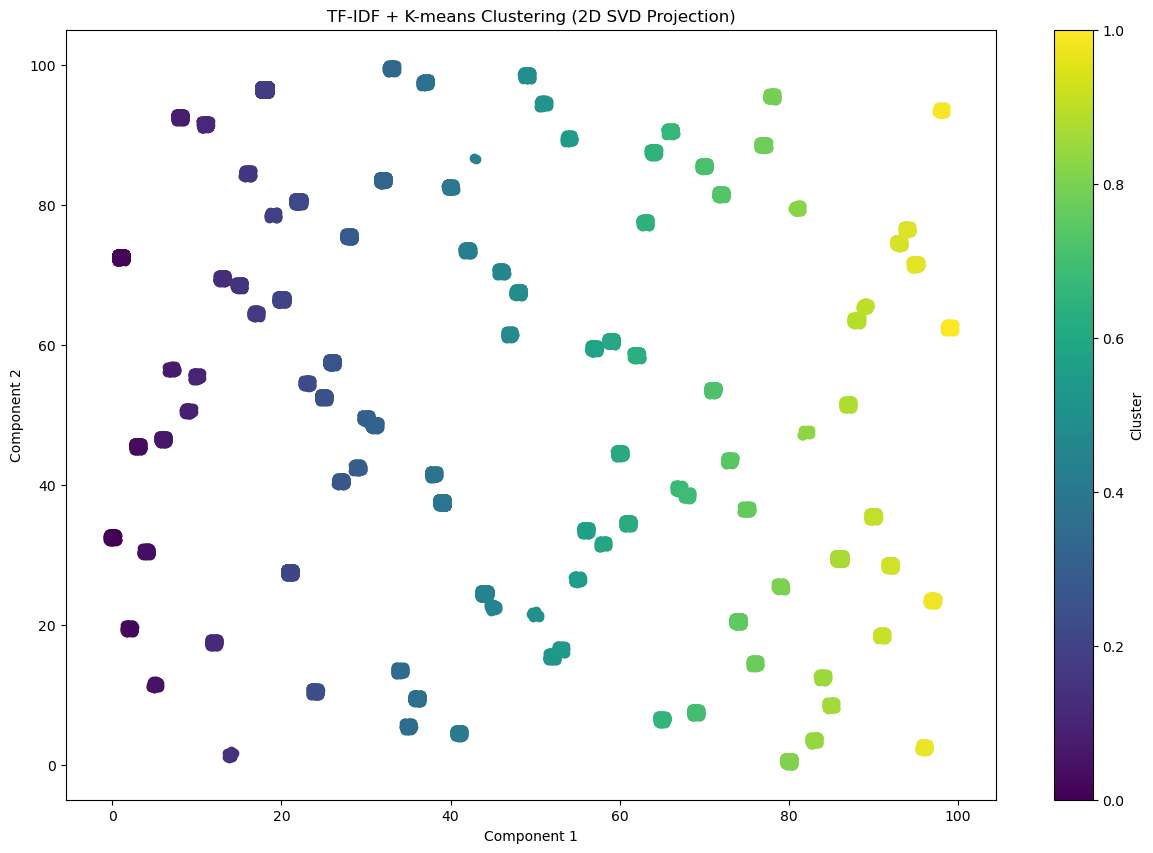

In [5]:
n_clusters = 100
plt.figure(figsize=(15, 10))
color_scale = px.colors.sample_colorscale(
    "viridis", [n / (n_clusters - 1) for n in range(n_clusters)]
)

color_scale = map(
    lambda x: tuple(
        [
            int(i)/255
            for i in x.replace("rgb", "").replace("(", "").replace(")", "").split(",")
        ]
    ),
    color_scale,
)
cluster_numbers = sample(range(0, n_clusters), n_clusters)

for category, color, cluster_number in zip(range(n_clusters), color_scale, cluster_numbers):
    categories = categorised_data[categorised_data["category"] == category]
   
    x = sample(range(-50000, 50001), len(categories))
    x = list(map(lambda x: category + (x / 100000), x))

    y = sample(range(1, 100001), len(categories))
    y = list(map(lambda y : cluster_number + (y/100001),y))

    plt.scatter(x[:], y, c=[color])

plt.title("TF-IDF + K-means Clustering (2D SVD Projection)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label='Cluster')
plt.show()